# protostars
## 03- Surface gravity versus effective temperature
### I. Doppman, Greene, Covey, and Lada

Table 3 from this paper:  
Title: The Physical Natures of Class I and Flat-Spectrum Protostellar 
       Photospheres: A Near-Infrared Spectroscopic Study  
Authors: Doppmann G.W., Greene T.P., Covey K.R., Lada C.J. 

We will also use data from Cottaar et al. 2014.


http://iopscience.iop.org/article/10.1086/431954/pdf

In [1]:
import pandas as pd
from astropy.io import ascii

In [2]:
cott = pd.read_csv('/Users/gully/GitHub/ApJdataFrames/data/Cottaar2014/per_star.csv')

In [3]:
tbl3_raw = ascii.read('http://iopscience.iop.org/article/10.1086/431954/fulltext/datafile3.txt')

In [4]:
tbl3_raw[0:4]

Name,f_Teff,Teff,E_Teff,e_Teff,f_log(g),log(g),E_log(g),e_log(g),vsin(i),E_vsin(i),e_vsin(i),rK,E_rK,e_rK,VLSR,Lum
,,K,K,K,,[cm/s2],[cm/s2],[cm/s2],km / s,km / s,km / s,,,,km / s,solLum
str11,str4,int64,int64,int64,str4,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
04016+2610,--,4500,68,--,{<=},3.5,0.05,--,46,2.7,--,0.9,0.02,--,-12.8,4.9
04108+2803B,--,3500,22,--,{<=},3.5,0.03,--,14,3.3,--,1.1,0.08,--,5.4,0.4
04158+2805,--,3500,213,124,--,3.8,0.4,0.11,26,1.2,--,1.3,0.21,0.19,5.9,0.1
04181+2655,--,4000,202,301,--,4.2,0.3,0.5,33,1.3,0.9,0.2,0.004,--,5.6,1.8


In [5]:
tbl3 = tbl3_raw.to_pandas()

In [6]:
tbl3.head()

,Name,f_Teff,Teff,E_Teff,e_Teff,f_log(g),log(g),E_log(g),e_log(g),vsin(i),E_vsin(i),e_vsin(i),rK,E_rK,e_rK,VLSR,Lum
0,04016+2610,NaN,4500.0,68.0,NaN,{<=},3.5,0.05,NaN,46.0,2.7,NaN,0.9,0.020,NaN,-12.8,4.9
1,04108+2803B,NaN,3500.0,22.0,NaN,{<=},3.5,0.03,NaN,14.0,3.3,NaN,1.1,0.080,NaN,5.4,0.4
2,04158+2805,NaN,3500.0,213.0,124.0,NaN,3.8,0.40,0.11,26.0,1.2,NaN,1.3,0.210,0.19,5.9,0.1
3,04181+2655,NaN,4000.0,202.0,301.0,NaN,4.2,0.30,0.50,33.0,1.3,0.9,0.2,0.004,NaN,5.6,1.8
4,DG Tau,NaN,4000.0,105.0,33.0,NaN,4.0,0.12,0.06,24.0,2.0,NaN,2.0,0.100,NaN,7.1,5.5


In [7]:
from isochrones.bcah2002 import BCAH2002_Isochrone

In [8]:
bcah = BCAH2002_Isochrone()

In [9]:
sns.set_context('talk')
sns.set_style('ticks')

In [10]:
Teff_hi = tbl3['E_Teff']
Teff_lo = tbl3['e_Teff']

In [11]:
Teff_lo[Teff_lo.isnull()] = Teff_hi[Teff_lo.isnull()]

/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
Teff_err = np.vstack([Teff_hi, Teff_lo])

In [13]:
logg_hi = tbl3['E_log(g)']
logg_lo = tbl3['e_log(g)']
logg_lo[logg_lo.isnull()] = logg_hi[logg_lo.isnull()]
logg_err = np.vstack([logg_hi, logg_lo])

/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
from matplotlib.patches import Ellipse

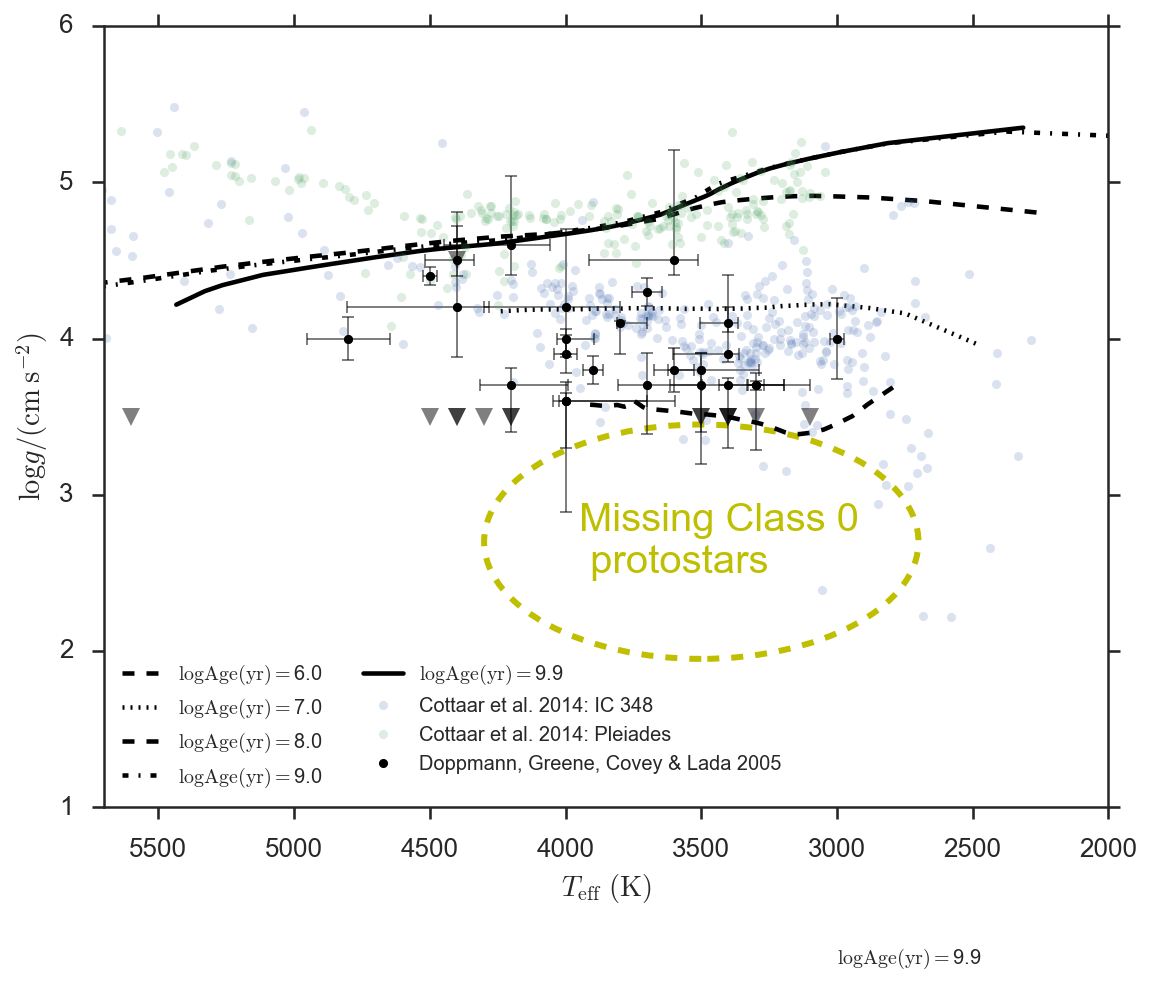

In [15]:
fig=plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    #plt.plot((ev['Teff']),ev['logg'],'-', alpha=1.0, label = '$M/M_{\odot} = $'+'{}'.format(mass))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot((ev['Teff']),ev['logg'], ls, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

plt.text(3000, 0.0, '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age), fontsize=10)

for cl, group in cott.groupby('Cluster'):
    plt.plot(group['Teff'], group['log(g)'], '.', alpha=0.2, label='Cottaar et al. 2014: {}'.format(cl))

    
mi = tbl3['f_log(g)'].isnull()
plt.plot(tbl3['Teff'][mi], tbl3['log(g)'][mi], 'k.',alpha=1.0, label='Doppmann, Greene, Covey & Lada 2005')

plt.legend(loc='lower left', ncol=2, fontsize=10)

plt.errorbar(tbl3['Teff'][mi], tbl3['log(g)'][mi], 
             xerr=Teff_err[:, mi.values], yerr=logg_err[:, mi.values], fmt='k.', alpha=0.5,
             barsabove=True, capthick=1, lw=1)
ui = tbl3['f_log(g)'].notnull()
plt.plot(tbl3['Teff'][ui], tbl3['log(g)'][ui], 'kv', alpha=0.5)

plt.xlabel('$T_\mathrm{eff}$ $\mathrm{(K)}$')
plt.ylabel('$\log{g/(\mathrm{cm \; s}^{-2})}}$')
plt.xlim(5700, 2000);
plt.ylim(1, 6.0);
plt.yticks(np.arange(1, 6.1, 1))

el = Ellipse(xy=(3500,2.7), width=1600.0, height=1.5, angle=0, facecolor='w', edgecolor='y', lw=3, linestyle='--')
ax.add_artist(el)
plt.text(3950, 2.5, 'Missing Class 0 \n protostars', fontsize=20, color='y')


plt.savefig('../plots/gully_Class0_Teff_logg.pdf')

In [16]:
cott.Cluster.unique()

array(['IC 348', 'Pleiades'], dtype=object)

In [17]:
cmap1 = sns.cubehelix_palette(light=1, as_cmap=True)
cmap2 = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
color_dict = {'IC 348':cmap1, 'Pleiades':cmap2}

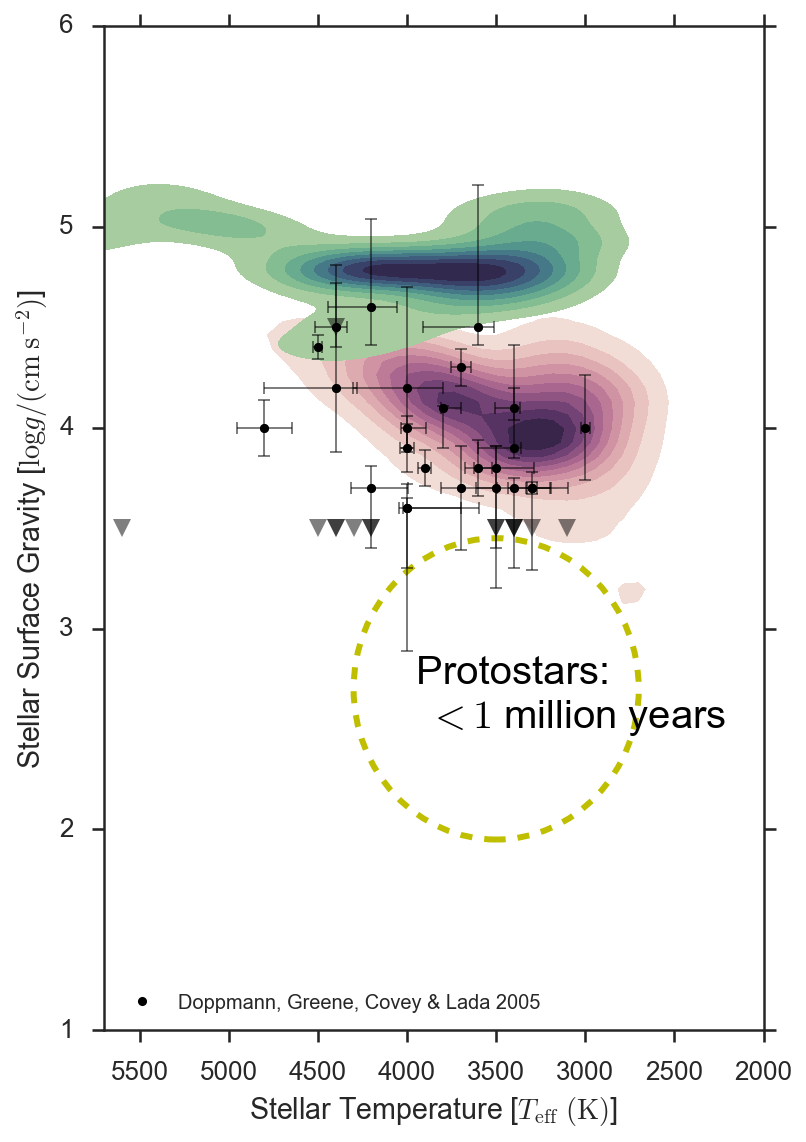

In [18]:
fig=plt.figure(figsize=(13, 9))
ax = fig.add_subplot(121)
for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    #plt.plot((ev['Teff']),ev['logg'],'-', alpha=1.0, label = '$M/M_{\odot} = $'+'{}'.format(mass))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    if age in np.array([6.0, 9.0]):
        ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
        #plt.plot((ev['Teff']),ev['logg'], ls, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

for cl, group in cott.groupby('Cluster'):
    sns.kdeplot(group['Teff'], group['log(g)'], shade=True, shade_lowest=False,
                cmap=color_dict[cl],
                label='Cottaar et al. 2014: {}'.format(cl))

mi = tbl3['f_log(g)'].isnull()
plt.plot(tbl3['Teff'][mi], tbl3['log(g)'][mi], 'k.',alpha=1.0, label='Doppmann, Greene, Covey & Lada 2005')

plt.legend(loc='lower left', ncol=2, fontsize=10)

plt.errorbar(tbl3['Teff'][mi], tbl3['log(g)'][mi], 
             xerr=Teff_err[:, mi.values], yerr=logg_err[:, mi.values], fmt='k.', alpha=0.5,
             barsabove=True, capthick=1, lw=1)
ui = tbl3['f_log(g)'].notnull()
plt.plot(tbl3['Teff'][ui], tbl3['log(g)'][ui], 'kv', alpha=0.5)

plt.xlabel('Stellar Temperature [$T_\mathrm{eff}$ $\mathrm{(K)}$]')
plt.ylabel('Stellar Surface Gravity [$\log{g/(\mathrm{cm \; s}^{-2})}}$]')
plt.xlim(5700, 2000);
plt.ylim(1, 6.0);
plt.yticks(np.arange(1, 6.1, 1))

el = Ellipse(xy=(3500,2.7), width=1600.0, height=1.5, angle=0, facecolor='w', edgecolor='y', lw=3, linestyle='--')
ax.add_artist(el)
plt.text(3950, 2.5, 'Protostars: \n $<1$ million years', fontsize=20, color='k')


plt.savefig('../plots/gully_Class0_Teff_logg_kde.pdf')

### Place a theory panel next to an observatinal panel.

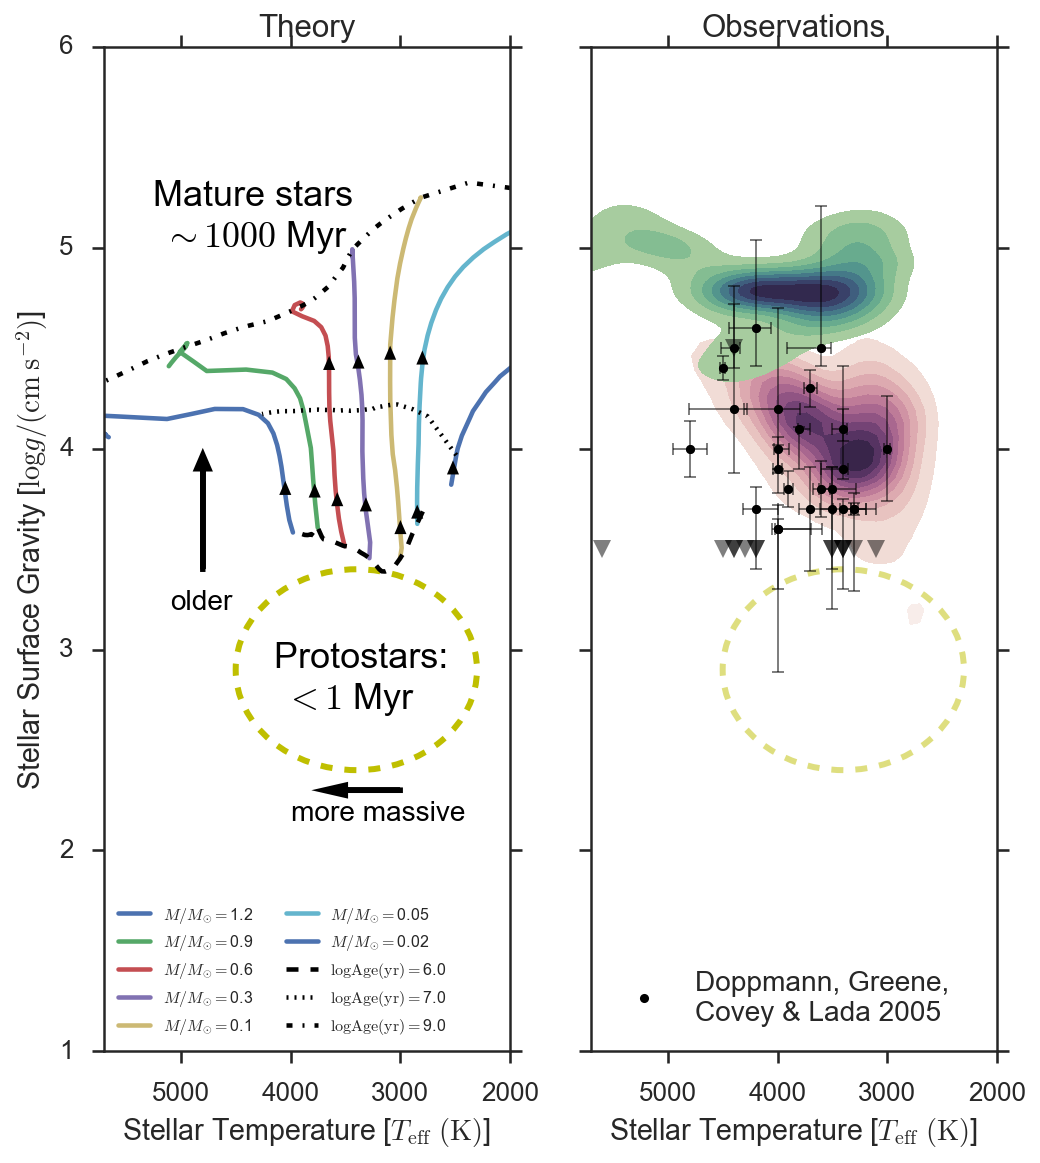

In [19]:
fig=plt.figure(figsize=(8, 9))
ax = fig.add_subplot(121)
for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    plt.plot((ev['Teff']),ev['logg'],'-', alpha=1.0, label = '$M/M_{\odot} = $'+'{}'.format(mass))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    if age in np.array([6.0, 7.0, 9.0]):
        ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
        plt.plot((ev['Teff']),ev['logg'], ls, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

plt.xlabel('Stellar Temperature [$T_\mathrm{eff}$ $\mathrm{(K)}$]')
plt.ylabel('Stellar Surface Gravity [$\log{g/(\mathrm{cm \; s}^{-2})}}$]')
plt.xlim(5700, 2000);
plt.ylim(1, 6.0);
plt.yticks(np.arange(1, 6.1, 1))
plt.xticks(np.arange(2000, 5001, 1000))

el = Ellipse(xy=(3400,2.9), width=2200.0, height=1.0, angle=0, facecolor='w', edgecolor='y', lw=3, linestyle='--')
ax.add_artist(el)

ax.arrow(4800, 3.4, 0, 0.5, head_width=110, head_length=0.07, fc='k', ec='k', lw=2.7)
plt.text(5100, 3.2, 'older', fontsize=14, color='k')

ax.arrow(3000, 2.3, 500, 0.0, head_width=0.05, head_length=200, fc='k', ec='k', lw=2.7)
plt.text(4000, 2.15, 'more massive', fontsize=14, color='k')

plt.text(5250, 5.0, 'Mature stars \n $\sim 1000$ Myr', fontsize=18, color='k')
plt.text(4150, 2.7, 'Protostars: \n $<1$ Myr', fontsize=18, color='k')

plt.legend(loc='lower left', fontsize=8, ncol=2)
plt.title('Theory')

for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    gi = np.abs(ev.age - 6.3) < 0.005
    plt.arrow(ev['Teff'][gi].values[0],ev['logg'][gi].values[0], 0, 0.07, shape='full', lw=0, 
              length_includes_head=True, head_width=110, fc='k', ec='k', head_length=0.07, zorder=10)
    if mass in [0.05, 0.1, 0.3, 0.6]:
        gi = np.abs(ev.age - 7.3) < 0.005
        plt.arrow(ev['Teff'][gi].values[0],ev['logg'][gi].values[0], 0, 0.07, shape='full', lw=0, 
              length_includes_head=True, head_width=110, fc='k', ec='k', head_length=0.07, zorder=10)

ax2 = fig.add_subplot(122)

for cl, group in cott.groupby('Cluster'):
    sns.kdeplot(group['Teff'], group['log(g)'], shade=True, shade_lowest=False,
                cmap=color_dict[cl],
                label='Cottaar et al. 2014: {}'.format(cl))

mi = tbl3['f_log(g)'].isnull()
plt.plot(tbl3['Teff'][mi], tbl3['log(g)'][mi], 'k.',alpha=1.0, label='Doppmann, Greene, \nCovey & Lada 2005')

plt.legend(loc='lower left', ncol=2, fontsize=14)

plt.errorbar(tbl3['Teff'][mi], tbl3['log(g)'][mi], 
             xerr=Teff_err[:, mi.values], yerr=logg_err[:, mi.values], fmt='k.', alpha=0.5,
             barsabove=True, capthick=1, lw=1)
ui = tbl3['f_log(g)'].notnull()
plt.plot(tbl3['Teff'][ui], tbl3['log(g)'][ui], 'kv', alpha=0.5)

plt.xlabel('Stellar Temperature [$T_\mathrm{eff}$ $\mathrm{(K)}$]')
plt.ylabel('')
plt.xlim(5700, 2000);
plt.ylim(1, 6.0);
plt.yticks(np.arange(1, 6.1, 1))
plt.xticks(np.arange(2000, 5001, 1000))

el = Ellipse(xy=(3400,2.9), width=2200.0, height=1.0, angle=0, facecolor='w', alpha=0.5, edgecolor='y', lw=3, linestyle='--')
ax2.add_artist(el)
plt.title('Observations')
ax2.axes.get_yaxis().set_ticklabels([])


plt.savefig('../plots/gully_Class0_Teff_logg_kde_2panel.pdf')

Looks good.

### Veiling plots

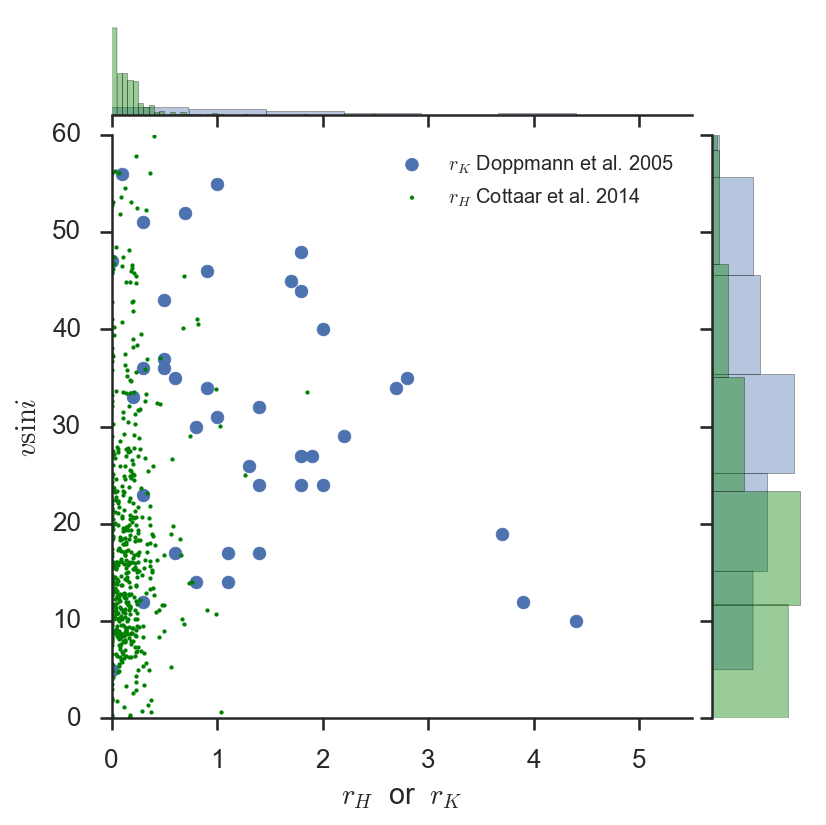

In [20]:
g = sns.jointplot(tbl3['rK'], tbl3['vsin(i)'], xlim=(0, 5.5), ylim=(0,60), kind='scatter', 
                  alpha=1.0, stat_func=None, marginal_kws={"norm_hist":True, 'hist':True, 'kde':False}, 
                  label='$r_K$ Doppmann et al. 2005',joint_kws={"s":40})
#g_alt = sns.kdeplot(cott.R_H, cott.vsini, ax=g.ax_joint, zorder=0, shade=True, shade_lowest=True,
#            label='Cottaar et al. 2014')
g.ax_joint.scatter(cott.R_H, cott.vsini, c="g", s=5, linewidth=1, marker=".", edgecolors='g',
                  label='$r_H$ Cottaar et al. 2014')

sns.distplot(cott.R_H, ax=g.ax_marg_x, norm_hist=True, kde=False, hist=True, color='g',
             axlabel='')

sns.distplot(cott.vsini, ax=g.ax_marg_y, norm_hist=True, kde=False, hist=True, color='g',
             axlabel='', vertical=True)
g.set_axis_labels(xlabel='$r_H$  or  $r_K$', ylabel='$v\sin{i}$')
g.ax_joint.legend(loc='best', fontsize=10)

More exploration

In [21]:
tbl3.columns

Index(['Name', 'f_Teff', 'Teff', 'E_Teff', 'e_Teff', 'f_log(g)', 'log(g)',
       'E_log(g)', 'e_log(g)', 'vsin(i)', 'E_vsin(i)', 'e_vsin(i)', 'rK',
       'E_rK', 'e_rK', 'VLSR', 'Lum'],
      dtype='object')

In [22]:
cott.columns

Index(['2MASS', 'RA(deg)', 'Dec(deg)', 'Cluster', 'N(epochs)',
       'baseline(days)', 'S/N', 'Teff', 'sig_Teff', 'P(cnst_Teff)', 'log(g)',
       'sig_log(g)', 'P(cnst_log(g))', 'vsini', 'sig_vsini', 'P(cnst_vsini)',
       'R_H', 'sig_R_H', 'P(cnst_R_H)', '2MASS_J', '2MASS_H', '2MASS_Ks',
       'E(J-H)', 'extinction-corrected_J'],
      dtype='object')

In [23]:
ev.keys()

Index(['J_mag', 'Teff', 'age', 'logL', 'logg', 'mass', 'radius'], dtype='object')

In [24]:
ApJDF = "/Users/gully/GitHub/ApJdataFrames/data/"

luhman2003_tbl2 = pd.read_csv(ApJDF+'Luhman2003/tbl2.csv', sep='\t', 
                              usecols=['LBol', 'Teff']).dropna() #IC348
luhman2004c_tbl3 = pd.read_csv(ApJDF+'Luhman2004c/tbl3.csv', sep='\t', 
                               usecols=["Lbol","Teff"]).dropna() #Taurus
luhman2007_tbl6 = pd.read_csv(ApJDF+'Luhman2007/tbl6.csv', sep='\t',
                              usecols=['L_bol', 'T_eff']).dropna() #Cha I
luhman2009_tbl2 = pd.read_csv(ApJDF+'Luhman2009/tbl2.csv', sep='\t',
                              usecols=['L_bol', 'T_eff']).dropna() # More Taurus
luhman2007_tbl6 = luhman2007_tbl6[~luhman2007_tbl6.T_eff.str.contains(r'\\')]

In [25]:
tbl3['logL'] = np.log10(tbl3['Lum'])

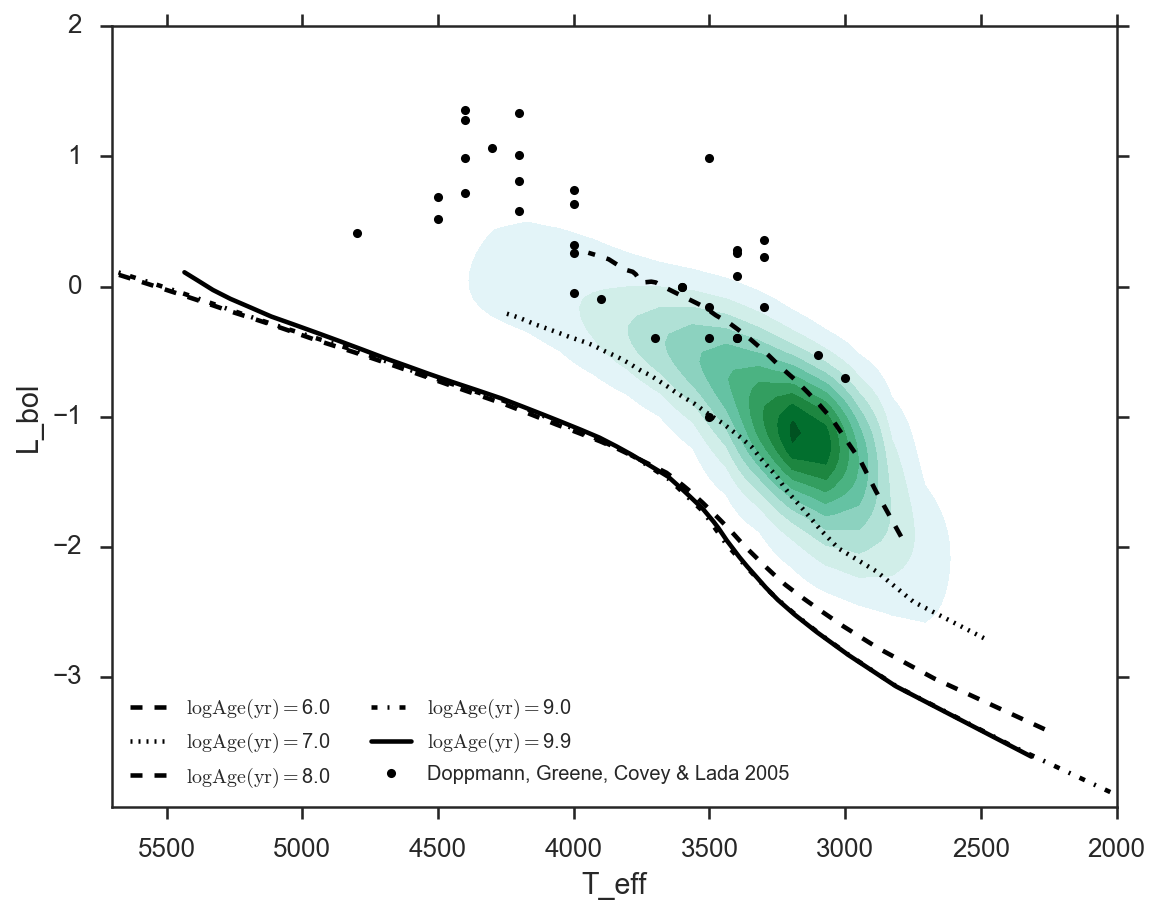

In [26]:
fig=plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    #plt.plot((ev['Teff']),ev['logg'],'-', alpha=1.0, label = '$M/M_{\odot} = $'+'{}'.format(mass))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot((ev['Teff']),ev['logL'], ls, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))
    
plt.plot(tbl3['Teff'], tbl3['logL'], 'k.',alpha=1.0, label='Doppmann, Greene, Covey & Lada 2005')

plt.legend(loc='lower left', ncol=2, fontsize=10)

plt.xlabel('$T_\mathrm{eff}$ $\mathrm{(K)}$')
plt.ylabel('Luminosity')
plt.xlim(5700, 2000);
plt.ylim(-4, 2.0);
plt.yticks(np.arange(-3, 2.1, 1))

sns.kdeplot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), shade=True,
                 shade_lowest=False)

plt.savefig('../plots/gully_Class0_pms_HR.pdf')

The end.